In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

data = pd.read_csv('data/housing.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


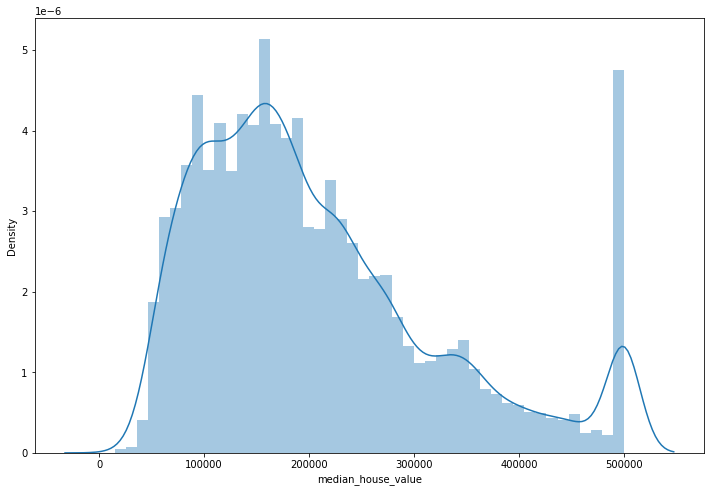

In [2]:
plt.figure(figsize=(12,8))
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
sns.distplot(y)
plt.show()

In [3]:
X = pd.concat([X, pd.get_dummies(X.ocean_proximity)], axis=1)
X = X.drop(['ocean_proximity'],axis=1)
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = X[['longitude', 'latitude', 'housing_median_age', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)
print("R score: {0}".format(round(lm.score(X_train, y_train),2)))
print("Intercept: {0}".format(round(lm.intercept_),))
pd.DataFrame({'feature':X.columns, 'coef':lm.coef_})

R score: 0.61
Intercept: -1959416


,feature,coef
0,longitude,-23200.151341
1,latitude,-21334.382684
2,housing_median_age,1101.016089
3,households,25.254305
4,median_income,37691.247397
5,<1H OCEAN,-24570.622782
6,INLAND,-69876.872130
7,ISLAND,132925.194262
8,NEAR BAY,-22998.713078
9,NEAR OCEAN,-15478.986271


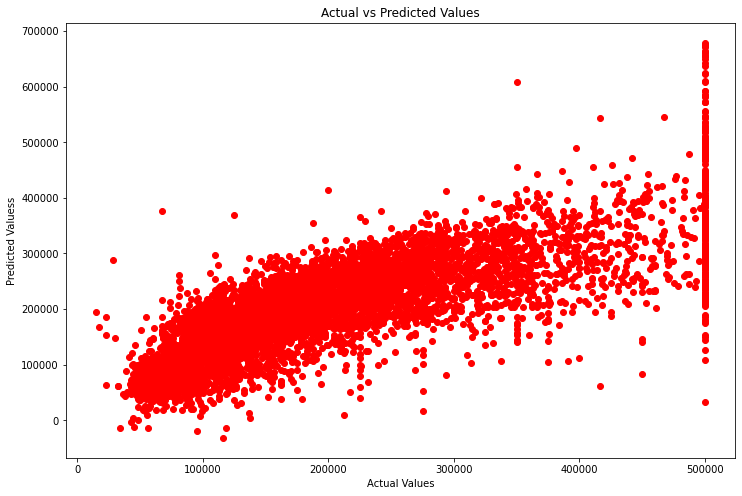

In [5]:

plt.figure(figsize=(12,8))
plt.scatter(y_test, lm.predict(X_test), color='r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Valuess")
plt.title("Actual vs Predicted Values")
plt.show()

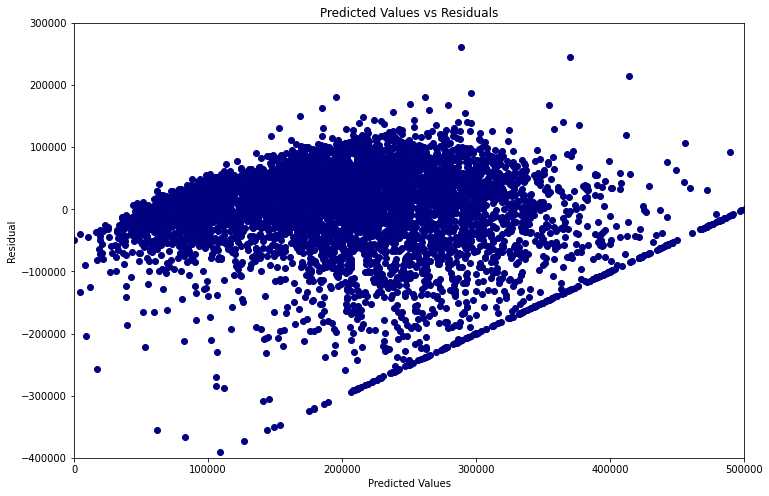

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c = 'navy')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Predicted Values vs Residuals')
plt.xlim(0,500000)
plt.ylim(-400000,300000)
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(lm.predict(X_test), y_test)
mse = mean_squared_error(lm.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 52298.52
Mean Squared Error (MSE): 5088802214.06
Root Mean Squared Error (RMSE): 71335.84


In [8]:

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

model.summary()

Mean Absolute Error (MAE): 52298.52
Mean Squared Error (MSE): 5088802214.06
Root Mean Squared Error (RMSE): 71335.84


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2550.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:56:27   Log-Likelihood:            -1.8208e+05
No. Observations:               14448   AIC:                         3.642e+05
Df Residuals:                   14438   BIC:                         3.643e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude           -2.32e+04   1240.626    -18.700      0.000   -2.56e+04   -2.08e+04
latitude           -2.133e+04   1223.365    -17.439      0.000   -2.37e+04   -1.89e+04
housing_median_age  1101.0161     54.258     20.292      0.000     994.663    1207.369
households            25.2543      1.667     15.151      0.000      21.987      28.521
median_income       3.769e+04    333.001    113.186      0.000     3.7e+04    3.83e+04
<1H OCEAN          -1.984e+06   1.07e+05    -18.516      0.000   -2.19e+06   -1.77e+06
INLAND             -2.029e+06   1.06e+05    -19.172      0.000   -2.24e+06   -1.82e+06
ISLAND             -1.826e+06   1.14e+05    -16.056      0.000   -2.05e+06    -1.6e+06
NEAR BAY           -1.982e+06   1.08e+05    -18.412      0.000   -2.19e+06   -1.77e+06
NEAR OCEAN         -1.975e+06   1.08e+05    -18.360      0.000   -2.19e+06   -1.76e+06
==============================================================================
Omnibus:                     3437.671   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9772.290
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                       6.157   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-Veri tiplerini kontrol etme/düzeltme.

-Açıklayıcı veri analizi ve görselleştirme.

-Eksik verileri tahmin etme/veri atama.

-Veri setini eğitim ve test veri-setlerine ayırma.

-Modeli eğitme ve test verisi üzerinde tahmin yapma.

-Gerçek değerlerle tahmin edilen değerler arasındaki ilişkiye bakma.

-Tahmin edilen değerlerle hata terimleri arasındaki ilişkiye bakma.

-Regresyon başarı metriklerine bakma.